<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Scraping_Morphological_Analysis_WordCloud_Spreadsheet_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download

     |████████████████████████████████| 488 kB 4.3 MB/s 
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7426 sha256=7088b2df186fbc77c54251ef603a78393ee199517f5a1cc98f813ab9cfef48e2
  Stored in directory: /root/.cache/pip/wheels/ce/4d/f1/170bb74b559ca338113c0315c9805e16dfd0a12411ec6b1122
Successfully built unidic
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:07<00:00, 66.8MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://news.google.com/?hl=ja&gl=JP&ceid=JP:ja"

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('a', class_='DY5T1d')

In [ ]:
import MeCab
import unidic

news = ''
for e in elems:
  news += e.getText() + '\n'

print(news)

オミクロン株 京都府で確認 「市中感染」か 女性1人 経路不明
オミクロン株の市中感染確認「基本的対策、これまで以上に徹底を」…専門家呼びかけ（読売新聞オンライン） - Yahoo!ニュース
記者会見する尾身茂会長
橋下徹氏 「法律違反」「国会議員がちゃんとルールを」オミクロン株濃厚接触者の指定施設14日間待機
【LIVE】大阪・吉村知事会見 オミクロン株 初の市中感染(2021年12月23日)
【独自】在日米軍 多数の部隊で米国出国時に検査確認せず（TBS系（JNN）） - Yahoo!ニュース
松野官房長官、米軍出入国時にコロナ検査要請 集団感染受け - 毎日新聞
米軍クラスター「出国時検査せず」 林外相が米側に検査徹底要請
在沖米軍、出国時検査せず 官房長官
在日米軍、米国出国時にPCRせず 基地クラスター巡り明らかに - 毎日新聞
東京の新規感染者数３７人に井上貴博アナ「重症度、発症率などを客観的に慎重に見守るということだと思います」（スポーツ報知） - Yahoo!ニュース
【速報】東京４０人の新規感染確認 新型コロナ 22日
東京都 新型コロナ ３７人感染確認 前週同曜日比６日連続増｜NHK 首都圏のニュース
新型コロナ 東京都で新たに40人感染確認 40人超えは67日ぶり（フジテレビ系（FNN）） - Yahoo!ニュース
【速報】東京で新たに３７人感染 ６日連続で前週の同じ曜日を上回る
《北新地ビル放火》「真面目で職人気質で寡黙。でもカチンとくると顔を真っ赤にして…」実兄と元雇用主が証言する“放火容疑者”の正体
大阪ビル放火容疑者、体当たりで逃げる患者ら押し戻す…廊下のドア閉め閉じ込めたか（読売新聞オンライン） - Yahoo!ニュース
２５人死亡放火殺人 容疑者が体当たりで避難経路ふさいだか
新たに犠牲者２人の身元公表 大阪・北新地ビル火災
現場からガソリン・刃物 被害者26人は医院の奥で倒れる（写真=共同）
電動キックボード「16歳以上の年齢制限」など…警察庁が“改正案”の方針固める
電動キックボード規制緩和へ 運転免許不要 ヘルメット任意 一部は歩道も走行可 道交法改正方針（FNNプライムオンライン） - Yahoo!ニュース
電動キックボードは免許不要 ヘルメットも「努力義務」
電動キック 20km以下は無免許可 (2021年12月23日掲載

In [ ]:
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(',')[0]
  word = node.surface
  if hinshi in ['名詞']:
    origin = word
    words.append(origin)

  node = node.next

In [ ]:
import collections
count = collections.Counter(words)
print(count)
print(count.most_common(30))

Counter({'ニュース': 12, '感染': 11, 'Yahoo': 9, '確認': 6, '年': 5, '月': 5, '米軍': 5, '時': 5, '検査': 5, 'コロナ': 5, '東京': 5, '電動': 5, 'キック': 5, '株': 4, '以上': 4, '新聞': 4, '2021': 4, '12': 4, '出国': 4, '新型': 4, '放火': 4, 'ボード': 4, '市中': 3, 'オン': 3, 'ライン': 3, '施設': 3, '大阪': 3, '23': 3, '３７': 3, 'ビル': 3, '容疑': 3, '改正': 3, '方針': 3, '免許': 3, '日本': 3, '大雪': 3, '注意': 3, '寒波': 3, '1': 3, '女性': 2, '経路': 2, '徹底': 2, '読売': 2, '会見': 2, '在日': 2, '米国': 2, '官房': 2, '長官': 2, '要請': 2, '毎日': 2, 'クラスター': 2, '度': 2, 'こと': 2, '速報': 2, '都': 2, '前週': 2, '６': 2, '連続': 2, '増': 2, '40': 2, 'FNN': 2, '北': 2, '新地': 2, '体当たり': 2, 'ドア': 2, '26': 2, '16': 2, '年齢': 2, '制限': 2, '警察': 2, '案': 2, 'ヘルメット': 2, '可': 2, '20': 2, '週末': 2, '積雪': 2, 'クリスマス': 2, '年末': 2, '台': 2, '乃木坂': 2, '46': 2, 'アルミ': 2, '開発': 2, 'インタビュー': 2, '京都': 1, '府': 1, '1人': 1, '不明': 1, '基本': 1, '対策': 1, '専門': 1, '呼びかけ': 1, '記者': 1, '尾身': 1, '茂': 1, '会長': 1, '橋下': 1, '徹': 1, '法律': 1, '違反': 1, '国会': 1, '議員': 1, 'ルール': 1, '接触': 1, '指定': 1, '14': 1, '日間': 1, '待機': 1, '

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 3s (2,641 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

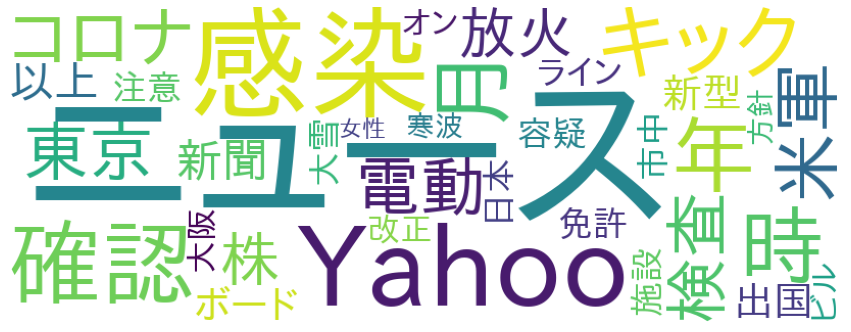

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import codecs
fpath = './fonts/IPAfont00303/ipagp.ttf'

def show_word_cloud(ws):
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    random.shuffle(ws_show)
    # スペース区切り
    texts = ' '.join(ws_show)
    
    # 描画
    wc = WordCloud(background_color="white", font_path=fpath, 
                   width=820, height=312, regexp=r"[\w']+").generate(texts)
    plt.figure(figsize=(15,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

show_word_cloud(count.most_common(40))

In [ ]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
ss_name = 'News_Colab'
workbook = gc.open(ss_name)
worksheet = workbook.worksheet('GoogleNews')

for string in count.keys():
  worksheet.append_row([string])